# Best Time to Post on Hacker News for Engagement
## Background
[Hacker News](https://news.ycombinator.com/) is a website started by [Y Combinator](https://www.ycombinator.com/). Much like reddit, posts on Hacker News are positioned based on the number of votes and comments they receive. Hacker News is different than reddit in that it caters more specifically to technology professionals and entrepreneurs. For context, posts that reach the top of Hacker News' listings can get hundreds of thousands of visitors.

## Objective
For this project, we are specifically focused on posts with one of the following two phrases in the title: "Ask HN" or "Show HN". Users submit "Ask HN" posts to crowd source the Hacker News community to find answers to a specific questions, whereas "Show HN" posts are usually the byproduct of users sharing their projects/thoughts/findings with the Hacker News community. Through our analysis, we will attempt to answer the following two question:
1. Do Ask HN or Show HN receive more comments on average?
2. Do posts created at a certain time receive more comments on average?

## Opening and Exploring the Data Set
In this project, we will work with the following [Kaggle data set](https://www.kaggle.com/hacker-news/hacker-news-posts) that has been reduced from almost 300,000 rows to ~20,000 rows. Note that the data set we are analyzing no longer contains submissions that did not receive any comments and is limited to recent posts (past ~12 months).

Below are descriptions (and corresponding column indexes) of the data set's columns:

0. 'id': The unique identifier from Hacker News for the post
1. 'title': The title of the post
2. 'url': The URL that the posts links to, if the post has a URL
3. 'num_points': The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
4. 'num_comments': The number of comments that were made on the post
5. 'author': The username of the person who submitted the post
6. 'created_at': The date and time at which the post was submitted

In [1]:
from csv import reader

opened_file = open('hacker_news.csv')
read_file = reader(opened_file)
hn = list(read_file)
# Seperate headers from rest of data
hn_headers = hn[0]
hn = hn[1:] 

print("Data Set Headers: {}".format(hn_headers))
print("\n")
print("First Five Rows:\n{}".format(hn[:5]))
print("\n")
print("Rows: {}".format(len(hn)))


Data Set Headers: ['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


First Five Rows:
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell'

Once we have a basic understanding of the data set, we now seperate posts by type. This analysis focuses specifically on "Ask HN" and "Show HN" posts, so we will split `hn` into three seperate lists by post type: `ask_posts`, `show_posts`, and `other_posts`.

In [2]:
ask_posts = []
show_posts = []
other_posts = []

# Use lower() to ensure all case variations of "Ask HN" and "Show HN" posts are captured
for row in hn:
    title = row[1]
    if title.lower().startswith("ask hn"):
        ask_posts.append(row)
    elif title.lower().startswith("show hn"):
        show_posts.append(row)
    else:
        other_posts.append(row)

print("Ask Posts: {}".format(len(ask_posts)))
print("Show Posts: {}".format(len(show_posts)))
print("Other Posts: {}".format(len(other_posts)))
print("\n")

# Print example rows from each list
print("First Five Ask Posts\n{}".format(ask_posts[:5]))
print("\n")
print("First Five Show Posts\n{}".format(show_posts[:5]))
print("\n")
print("First Five Other Post\n{}".format(other_posts[:5]))

Ask Posts: 1744
Show Posts: 1162
Other Posts: 17194


First Five Ask Posts
[['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43'], ['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14'], ['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', '1', '3', 'sph130', '8/2/2016 14:20'], ['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', '28', '17', 'roykolak', '10/15/2015 16:38']]


First Five Show Posts
[['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'], ['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46'], ['11590768'

## Average Number of Comments by Post Type ("Ask HN" vs. "Show HN")

In [3]:
# Determine number of "Ask HN" comments; used in average calculation
total_ask_comments = 0
for row in ask_posts:
    num_comments = int(row[4])
    total_ask_comments += num_comments

avg_ask_comments = total_ask_comments / len(ask_posts)
print("Avg. Ask Comments: {avg:.2f}".format(avg=avg_ask_comments))

# Repeat above process, but for "Show HN" posts
total_show_comments = 0
for row in show_posts:
    num_comments = int(row[4])
    total_show_comments += num_comments

avg_show_comments = total_show_comments / len(show_posts)
print("Avg. Show Comments: {avg:.2f}".format(avg=avg_show_comments))
    
    

Avg. Ask Comments: 14.04
Avg. Show Comments: 10.32


"Ask HN" posts are generating ~36% more come comments on average than "Show HN" posts. This finding is intuitive because an "Ask HN" post is directly soliciting a response/answer to the user's question, whereas "Show HN" posts are not necessarily seeking a response in the form of a comment.

We will focus our remaining analysis solely on "Ask HN" posts since we have determined that they attract significantly more comments on average.

## "Ask HN" Posts: Time of Day Analysis
We will now focus on the second question: Do posts created at a certain time receive more comments on average?

We first calculate the quantity of "Ask HN" posts created each hour, along with the total number of comments.

In [4]:
# Import datetime in order to effectively analyze 'created-at' column
import datetime as dt

result_list = []
for row in ask_posts:
    date_created = row[6]
    num_comments = int(row[4])
    result_list.append([date_created, num_comments])

# Create frequency table, grouped by hour of post
counts_by_hour = {}
comments_by_hour = {}
for row in result_list:
    dt_instance = dt.datetime.strptime(row[0], "%m/%d/%Y %H:%M")
    hour = dt_instance.strftime("%H")
    num_comments = row[1]
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = num_comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += num_comments

# Above frequency table used to populate list of averages by hour
avg_by_hour = []
for hour in comments_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])

swap_avg_by_hour = []
for hour in avg_by_hour:
    swap_avg_by_hour.append([hour[1], hour[0]])

sorted_swap = sorted(swap_avg_by_hour, reverse=True)

print("Top Five Hours for Ask Post Comments")
for hour in sorted_swap[:5]:
    dt_instance = dt.datetime.strptime(hour[1], "%H")
    dt_hour = dt_instance.strftime("%H:%M")
    print("{hour}: {avg:.2f} average comments per post".format(hour=dt_hour, avg=hour[0]))

print('\n')
print("Bottom Five Hours for Ask Post Comments")    
for hour in sorted_swap[-5:]:
    dt_instance = dt.datetime.strptime(hour[1], "%H")
    dt_hour = dt_instance.strftime("%H:%M")
    print("{hour}: {avg:.2f} average comments per post".format(hour=dt_hour, avg=hour[0]))


Top Five Hours for Ask Post Comments
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


Bottom Five Hours for Ask Post Comments
07:00: 7.85 average comments per post
03:00: 7.80 average comments per post
04:00: 7.17 average comments per post
22:00: 6.75 average comments per post
09:00: 5.58 average comments per post


By contrasting the top five hours and bottom five hours, it is clear that the timing of the post has some material impact on the number of comments received. We will now focus our attention on the top five hours, and the specific drivers of the high average number of comments.

## Discussion of Findings
#### Outlier Driving 02:00 Hour Results
Of the top five hours for comments, four seem to fall in line with the same narrative. 15:00, 16:00, 20:00 and 21:00 are within the late afternoon/evening for those on the east coast and overlap with the west coast afternoon. These times attracting high comment volume makes intuitive sense since one would imagine that Hacker News users would be most engaged after work/class hours and that recent posts would draw their attention.

The 02:00 hour generating significant comment activity seems to be an outlier. Let's dig into what is driving the high average number of comments at the 02:00 hour.

In [5]:
# Create list of "Ask HN" posts at the 2:00 hour to determine driver of high average
two_ask_posts = []
for row in ask_posts:
    dt_instance = dt.datetime.strptime(row[-1], "%m/%d/%Y %H:%M")
    hour = dt_instance.strftime("%H")
    if hour == "02":
        num_comments = int(row[4])
        two_ask_posts.append([num_comments, row[1]])

# Sort to show the most commented on posts
two_posts_sorted = sorted(two_ask_posts, reverse=True)
print("Top Five Most Commented Ask Posts from 2:00 Hour:")
for row in two_posts_sorted[:5]:
    post_title = row[1] 
    num_comments = row[0]
    print("{comments} average comments per post: {title}".format(comments=num_comments, title=post_title))

Top Five Most Commented Ask Posts from 2:00 Hour:
868 average comments per post: Ask HN: What's the best tool you used to use that doesn't exist anymore?
101 average comments per post: Ask HN: How can I tell if I have programming aptitude?
41 average comments per post: Ask HN: The best app to keep a work diary
31 average comments per post: Ask HN: Where are 150k to 200k salary job in Silicon Valley?
30 average comments per post: Ask HN: Settle for less salary or change to make more in prime years


Clearly the average is skewed by _Ask HN: What's the best tool you used to use that doesn't exist anymore?_ This post, which is among the most commented "Ask HN" posts regardless of hour, has generated more than 8x the comments of any other post at the 02:00 hour.

#### Drivers of High Average Number of Comments (15:00, 16:00, 20:00, 21:00)
Let us run the same analysis on 15:00, 16:00, 20:00 and 21:00 to see if we notice any noteworthy patterns.

In [6]:
# Repeat same process, seperating lists by hour
# Seeking to identify patterns and drivers of comment volume
fifteen_ask_posts = []
sixteen_ask_posts = []
twenty_ask_posts = []
twenty_one_ask_posts = []

for row in ask_posts:
    dt_instance = dt.datetime.strptime(row[-1], "%m/%d/%Y %H:%M")
    hour = dt_instance.strftime("%H")
    if hour == "15":
        num_comments = int(row[4])
        fifteen_ask_posts.append([num_comments, row[1]])
    if hour == "16":
        num_comments = int(row[4])
        sixteen_ask_posts.append([num_comments, row[1]])
    if hour == "20":
        num_comments = int(row[4])
        twenty_ask_posts.append([num_comments, row[1]])
    if hour == "21":
        num_comments = int(row[4])
        twenty_one_ask_posts.append([num_comments, row[1]])

# Sort to show the most commented on posts for each of these hours
fifteen_posts_sorted = sorted(fifteen_ask_posts, reverse=True)
sixteen_posts_sorted = sorted(sixteen_ask_posts, reverse=True)
twenty_posts_sorted = sorted(twenty_ask_posts, reverse=True)
twenty_one_posts_sorted = sorted(twenty_one_ask_posts, reverse=True)


print("Top Five Most Commented Ask Posts from 15:00 Hour:")
for row in fifteen_posts_sorted[:5]:
    post_title = row[1] 
    num_comments = row[0]
    print("{comments} comments: {title}".format(comments=num_comments, title=post_title))
print('\n')

print("Top Five Most Commented Ask Posts from 16:00 Hour:")
for row in sixteen_posts_sorted[:5]:
    post_title = row[1] 
    num_comments = row[0]
    print("{comments} comments: {title}".format(comments=num_comments, title=post_title))
print('\n')

print("Top Five Most Commented Ask Posts from 20:00 Hour:")
for row in twenty_posts_sorted[:5]:
    post_title = row[1] 
    num_comments = row[0]
    print("{comments} comments: {title}".format(comments=num_comments, title=post_title))
print('\n')

print("Top Five Most Commented Ask Posts from 21:00 Hour:")
for row in twenty_one_posts_sorted[:5]:
    post_title = row[1] 
    num_comments = row[0]
    print("{comments} comments: {title}".format(comments=num_comments, title=post_title))

Top Five Most Commented Ask Posts from 15:00 Hour:
947 comments: Ask HN: Who is hiring? (August 2016)
910 comments: Ask HN: Who is hiring? (September 2016)
283 comments: Ask HN: Who wants to be hired? (April 2016)
250 comments: Ask HN: Who wants to be hired? (June 2016)
202 comments: Ask HN: Who wants to be hired? (March 2016)


Top Five Most Commented Ask Posts from 16:00 Hour:
691 comments: Ask HN: How much do you make at Amazon? Here is how much I make at Amazon
140 comments: Ask HN: How do you review code?
112 comments: Ask HN: How do you use Amazon Echo?
108 comments: Ask HN: Do you still play with VR actively?
80 comments: Ask HN: Why do browsers still support pop up dialogs and other bad behavior?


Top Five Most Commented Ask Posts from 20:00 Hour:
514 comments: Ask HN: What book have you given as a gift?
477 comments: Ask HN: What do you wish someone would build?
183 comments: Ask HN: What's your favorite way to save money?
58 comments: Ask HN: What non-computer activities do 

As can be seen, the distribution of comments is less skewed at these hours. 

It is interesting that the top posts at the 15:00 hour seem to be very similar--all focused on employment opportunities and are all likely by the same author. Below we will look into the authors of these posts to try to glean insights from this common thread.

#### Impact of "Ask HN" Posts by whoishiring

In [7]:
# Iterate through 15:00 hour comments and save number of comments, hour, and author
fifteen_authors = []
for row in ask_posts:
    dt_instance = dt.datetime.strptime(row[-1], "%m/%d/%Y %H:%M")
    hour = dt_instance.strftime("%H")
    if hour == "15":
        num_comments = int(row[4])
        fifteen_authors.append([num_comments, row[1], row[-2]])

# Sort to show the most commented on posts
fifteen_authors_sorted = sorted(fifteen_authors, reverse=True)
        
print("Top Ten Most Commented Ask Posts from 15:00 Hour by Author:")
for row in fifteen_authors_sorted[:10]:
    author = row[2]
    post_title = row[1] 
    num_comments = row[0]
    print("{user}; {comments} comments: {title}".format(user=author, comments=num_comments, title=post_title))
print('\n')

# Modify list to isolate effect of whoishiring posts
# More granular 'created_at' filter to determine if all posts are at exact same time
whoishiring = []
for row in ask_posts:
    author = row[-2]
    dt_instance = dt.datetime.strptime(row[-1], "%m/%d/%Y %H:%M")
    time_of_day = dt_instance.strftime("%m/%d/%Y %H:%M")
    num_comments = int(row[4])
    if author == "whoishiring":
        whoishiring.append([num_comments, time_of_day])

print("whoishiring Posts:")
for row in whoishiring:
    num_comments = row[0]
    time_of_day = row[1]
    print("{comments} comments; posted at {time} EST".format(comments=num_comments, time=time_of_day))

# Determine if average number of comments at 15:00 hour is still significant without whoishiring posts
count = 0
comments = 0
for row in ask_posts:
    author = row[-2]
    dt_instance = dt.datetime.strptime(row[-1], "%m/%d/%Y %H:%M")
    hour = dt_instance.strftime("%H")
    num_comments = int(row[4])
    if hour == "15" and author != "whoishiring":
        count += 1
        comments += num_comments

print('\n')
avg_comments = comments / count
print("Avg. Comments ex-whoishiring Posts at 15:00 Hour:\n{avg:.2f}".format(avg=avg_comments))


Top Ten Most Commented Ask Posts from 15:00 Hour by Author:
whoishiring; 947 comments: Ask HN: Who is hiring? (August 2016)
whoishiring; 910 comments: Ask HN: Who is hiring? (September 2016)
whoishiring; 283 comments: Ask HN: Who wants to be hired? (April 2016)
whoishiring; 250 comments: Ask HN: Who wants to be hired? (June 2016)
whoishiring; 202 comments: Ask HN: Who wants to be hired? (March 2016)
the_wheel; 162 comments: Ask HN: What sites do you use to find contract work?
whoishiring; 158 comments: Ask HN: Freelancer? Seeking freelancer? (November 2015)
minionslave; 144 comments: Ask HN: Do I have to go through recruiters nowadays, how do you find new jobs?
bflesch; 128 comments: Ask HN: What to do when a Chinese startup clones your website?
whoishiring; 118 comments: Ask HN: Who wants to be hired? (August 2016)


whoishiring Posts:
250 comments; posted at 06/01/2016 15:01 EST
93 comments; posted at 12/01/2015 15:00 EST
910 comments; posted at 09/01/2016 15:00 EST
118 comments; pos

As can be seen, comments on "Ask HN" questions at the 15:00 hour are dominated by whoishiring posts. The top five and seven of the top ten most commented on posts from this hour are from whoishiring. Based on the timestamps for whoishiring posts, which show posts on the first of the month and right around 15:00, we can conclude that these are likely scheduled, auto-generated posts. See below for the August 2016 post that generated the most comments:
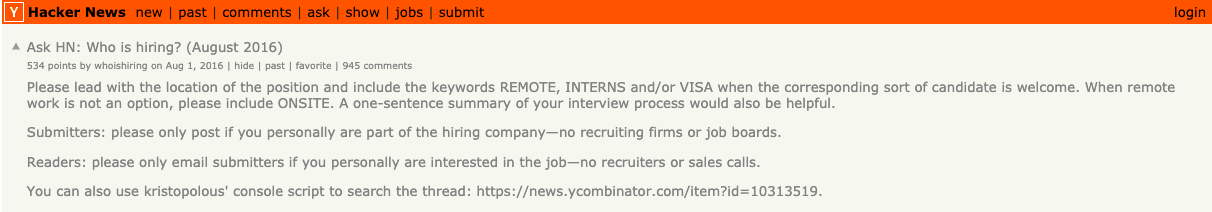

It is also interesting to note that the most popular (by number of comments) whoishiring posts were all from 2016. This aligns with the deceleration in tech job creation in 2016. As stated by Mercury News in a [2017 article](https://www.mercurynews.com/2017/02/10/tech-job-growth-slows-in-bay-area/), "tech’s annual job growth throttled back to 3.5 percent, or 26,700 new jobs, in 2016. That’s much slower than the 6 percent annual gain of 42,300 jobs in 2015, or the 6.4 percent gain in 2014."

Aside from whoishiring posts, the average number of comments per "Ask HN" post at the 15:00 hour is unremarkable.

## Conclusion
The intent of this analysis was to answer the following two questions: 

1. Do Ask HN or Show HN receive more comments on average?
2. Do posts created at a certain time receive more comments on average?

The data definitively shows that "Ask HN" posts receive more comments on average, which makes sense given that the intent of most of these posts is to receive answers from other users in the form of comments. Whereas "Show HN" posts often present findings or encourage collaboration on the underlying material, "Ask HN" posts cater specifically to communication in the comments section of the post.

Focusing on "Ask HN", we then tried to determine if the time of the post significantly impacts the number of comments. When looking into the top five hours by average number of comments, it is evident that the averages are skewed by specific authors that always post at the same time and outliers. The hour with the highest average number of comments per post was 15:00 with an average of 38.59. When digging into the most commented on posts, we uncovered the fact that the high average was driven by hiring posts from the author whoishiring. All of whoishiring's posts were essentially the same--prompting employers seeking new hires to describe the opening--and are posted on the first of the month right around 3pm EST (implying scheduled posts). When excluding posts from whoishiring, the average number of comments from 15:00 hour "Ask HN" posts is significantly lower at 13.37. Posts at the 02:00 hour generating the second highest average number of comments was surprsing given the timing for both east coast and west coast users (2am on east coast, 11pm on west coast). It turns out that the average of 23.81 was largely due to one popular post (_Ask HN: What's the best tool you used to use that doesn't exist anymore?_) which was among the most commented on posts on the entire website.

When excluding the hours of 15:00 and 02:00, the hours generating the most comments per post are 16:00, 20:00, 21:00. Intuitively, it is not surprising that these hours score high in terms of comments given that they align with late afternoon/evening for those on the east coast and overlap with the west coast afternoon. For prospective users looking to engage with the Hacker News community, we would recommend posting an "Ask HN" question between 4pm and 9pm eastern time.